### Stock Pair Statistical Arbitrage with Z-Scores
* Strategy Overview: Identify rolling average correlated stock pair Z-Score differences, setting con/divergence thresholds to trade on
* Objective: 
* Research various different pair correlations, testing multiple
* test different open/close thresholds, latency intervals, etc.
* backtest strategy

In [1]:
### Import Libraries
from datetime import date
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML

### Pair Correlations

In [2]:
end = date.today()
start = end.replace(year=end.year - 3) # Time horizon

# define all potentially correlated pairs
stock_pairs = {
    'Indices': [('SPY', 'QQQ'), ('DIA', 'IWM')],
    'Technology': [('AAPL', 'MSFT'), ('GOOGL', 'META'), ('AMD', 'NVDA'), ('ORCL', 'SAP'), ('ADBE', 'CRM')],
    'Automotive': [('GM', 'F'), ('TSLA', 'RIVN'), ('HMC', 'TM')],
    'Financial Services': [('JPM', 'GS'), ('V', 'MA'), ('COF', 'C'), ('BAC', 'WFC'), ('SCHW', 'MS')],
    'Consumer Goods': [('KO', 'PEP'), ('PG', 'UL'), ('CL', 'KMB'), ('MO', 'PM')],
    'Airlines': [('DAL', 'AAL'), ('LUV', 'JBLU'), ('UAL', 'ALK')],
    'Pharmaceuticals': [('PFE', 'MRNA'), ('JNJ', 'MRK'), ('BMY', 'LLY'), ('GILD', 'AMGN')],
    'Retail': [('AMZN', 'WMT'), ('HD', 'LOW'), ('JD', 'BABA'), ('COST', 'BJ'), ('TGT', 'COST')],
    'Entertainment and Media': [('NFLX', 'DIS'), ('CMCSA', 'T'), ('VIAC', 'DISCA'), ('DIS', 'CMCSA')],
    'Energy': [('XOM', 'CVX'), ('NEE', 'DUK'), ('BP', 'RDS.A'), ('SLB', 'HAL')],
    'Transportation': [('UBER', 'LYFT'), ('HTZ', 'CAR'), ('UPS', 'FDX')],
    'Consumer Services': [('DKNG', 'MGM'), ('BKNG', 'EXPE')],
    'Communications': [('VZ', 'TMUS'), ('CHL', 'CHA')],
    'Manufacturing': [('DE', 'CAT'), ('BA', 'LMT')],
    'Utilities': [('SO', 'DUK'), ('AEP', 'EXC')],
    'Materials': [('BHP', 'RIO'), ('FCX', 'NEM')],
    'Real Estate': [('SPG', 'EQR'), ('VTR', 'WELL')],
    'ETFs': [('SPY', 'IVV'), ('QQQ', 'VGT'), ('IWM', 'VTWO'), ('XLK', 'VGT'), ('XLF', 'VFH'), ('XLE', 'VDE'), ('XLY', 'VCR'), ('XLV', 'VHT'), ('XLI', 'VIS'), ('XLP', 'VDC'), ('XLU', 'VPU'), ('XLB', 'VAW'), ('VNQ', 'SCHH'), ('ITB', 'XHB'), ('VIXY', 'UVXY'), ('VXX', 'SVXY'), ('TLT', 'IEF'), ('GLD', 'SLV'), ('HYG', 'JNK'), ('LQD', 'AGG'), ('BND', 'SCHZ')],
}

results = []

for sector, pairs in stock_pairs.items():
    for stock1, stock2 in pairs:
        try:
            # Fetch adjusted close data for correlation
            data = yf.download([stock1, stock2], start=start, end=end)['Adj Close']
            if data.empty or len(data) < 2:
                print(f"No sufficient data for {stock1} and {stock2}")
                continue
            
            returns = data.pct_change().dropna()
            correlation = returns.corr().iloc[0, 1]
            
            # Fetch additional data for average volume and last close price
            data_volume = yf.download([stock1, stock2], start=start, end=end)['Volume']
            if data_volume.empty:
                print(f"No sufficient volume data for {stock1} and {stock2}")
                continue
            
            avg_volume_stock1 = round(data_volume[stock1].mean(), 2)
            avg_volume_stock2 = round(data_volume[stock2].mean(), 2)
            
            last_close_stock1 = round(data[stock1].iloc[-1], 2)
            last_close_stock2 = round(data[stock2].iloc[-1], 2)
            
            results.append({
                'Sector': sector,
                'Stock Pair': f'{stock1}-{stock2}',
                'Correlation': round(correlation, 2),
                'Avg Volume Stock 1': avg_volume_stock1,
                'Avg Volume Stock 2': avg_volume_stock2,
                'Last Close Stock 1': last_close_stock1,
                'Last Close Stock 2': last_close_stock2
            })
            
            print(f"Correlation between {stock1} and {stock2} is {correlation:.2f}")
            print(f"Average volume for {stock1}: {avg_volume_stock1}, Last close price: {last_close_stock1}")
            print(f"Average volume for {stock2}: {avg_volume_stock2}, Last close price: {last_close_stock2}\n")
        
        except Exception as e:
            print(f"Error processing {stock1} and {stock2}: {e}")

df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by='Correlation', ascending=False)

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between SPY and QQQ is 0.95
Average volume for SPY: 82065976.26, Last close price: 535.66
Average volume for QQQ: 54195103.98, Last close price: 464.83



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between DIA and IWM is 0.83
Average volume for DIA: 4145985.81, Last close price: 389.29
Average volume for IWM: 31195975.33, Last close price: 201.89



[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between AAPL and MSFT is 0.69
Average volume for AAPL: 73621601.86, Last close price: 193.12
Average volume for MSFT: 27249382.76, Last close price: 427.87



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between GOOGL and META is 0.60
Average volume for GOOGL: 32004882.63, Last close price: 175.01
Average volume for META: 25805815.25, Last close price: 502.6



[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between AMD and NVDA is 0.77
Average volume for AMD: 71400851.06, Last close price: 160.34
Average volume for NVDA: 480979888.73, Last close price: 121.79



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between ORCL and SAP is 0.45
Average volume for ORCL: 9008571.22, Last close price: 124.5
Average volume for SAP: 917273.87, Last close price: 190.24



[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between ADBE and CRM is 0.64
Average volume for ADBE: 3141169.89, Last close price: 459.94
Average volume for CRM: 6754874.8, Last close price: 241.84



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between GM and F is 0.82
Average volume for GM: 16276179.18, Last close price: 47.57
Average volume for F: 65266613.26, Last close price: 12.38

Correlation between TSLA and RIVN is 0.51
Average volume for TSLA: 101663628.51, Last close price: 173.79
Average volume for RIVN: 29840218.67, Last close price: 11.87



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between HMC and TM is 0.73
Average volume for HMC: 1042524.4, Last close price: 32.75
Average volume for TM: 266451.19, Last close price: 208.02



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between JPM and GS is 0.73
Average volume for JPM: 11695432.76, Last close price: 199.61
Average volume for GS: 2454849.87, Last close price: 453.55



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between V and MA is 0.89
Average volume for V: 7059292.44, Last close price: 275.04
Average volume for MA: 3151563.4, Last close price: 449.25



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between COF and C is 0.67
Average volume for COF: 2801931.3, Last close price: 140.9
Average volume for C: 19382651.06, Last close price: 61.43



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between BAC and WFC is 0.81
Average volume for BAC: 46026620.03, Last close price: 39.67
Average volume for WFC: 21711014.46, Last close price: 57.93



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between SCHW and MS is 0.62
Average volume for SCHW: 9788925.6, Last close price: 74.11
Average volume for MS: 8296969.89, Last close price: 96.39



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between KO and PEP is 0.77
Average volume for KO: 14616725.2, Last close price: 63.59
Average volume for PEP: 4925801.19, Last close price: 165.9



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between PG and UL is 0.46
Average volume for PG: 6835345.76, Last close price: 167.35
Average volume for UL: 2673726.13, Last close price: 55.59



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between CL and KMB is 0.64
Average volume for CL: 4525332.89, Last close price: 93.9
Average volume for KMB: 1808085.81, Last close price: 135.47



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between MO and PM is 0.57
Average volume for MO: 8907201.33, Last close price: 46.49
Average volume for PM: 4885553.45, Last close price: 103.68



[*********************100%%**********************]  2 of 2 completed


Correlation between DAL and AAL is 0.87
Average volume for DAL: 11404299.34, Last close price: 50.5
Average volume for AAL: 32131820.69, Last close price: 11.49



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between LUV and JBLU is 0.65
Average volume for LUV: 7444457.43, Last close price: 29.7
Average volume for JBLU: 11457374.01, Last close price: 5.59



[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between UAL and ALK is 0.79
Average volume for UAL: 9983554.77, Last close price: 53.03
Average volume for ALK: 1982961.01, Last close price: 41.35



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between PFE and MRNA is 0.30
Average volume for PFE: 30112513.79, Last close price: 28.07
Average volume for MRNA: 6786423.08, Last close price: 148.59



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between JNJ and MRK is 0.45
Average volume for JNJ: 8472676.39, Last close price: 147.13
Average volume for MRK: 9749523.74, Last close price: 131.49



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between BMY and LLY is 0.29
Average volume for BMY: 11736654.77, Last close price: 42.57
Average volume for LLY: 2954716.84, Last close price: 865.0



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between GILD and AMGN is 0.45
Average volume for GILD: 7095337.14, Last close price: 65.25
Average volume for AMGN: 2712588.59, Last close price: 304.72



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between AMZN and WMT is 0.23
Average volume for AMZN: 63241413.53, Last close price: 187.06
Average volume for WMT: 21492189.52, Last close price: 66.96



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between HD and LOW is 0.86
Average volume for HD: 3774166.71, Last close price: 332.56
Average volume for LOW: 3226942.04, Last close price: 218.1



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between JD and BABA is 0.80
Average volume for JD: 11552450.8, Last close price: 29.59
Average volume for BABA: 22453300.53, Last close price: 79.3



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between COST and BJ is 0.48
Average volume for COST: 2105142.44, Last close price: 848.34
Average volume for BJ: 1637202.65, Last close price: 89.21



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between TGT and COST is 0.49
Average volume for TGT: 4253360.08, Last close price: 148.52
Average volume for COST: 2105142.44, Last close price: 848.34



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between NFLX and DIS is 0.46
Average volume for NFLX: 6998762.33, Last close price: 644.5
Average volume for DIS: 12200797.61, Last close price: 102.74



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between CMCSA and T is 0.38
Average volume for CMCSA: 20600132.23, Last close price: 38.79
Average volume for T: 45489363.78, Last close price: 17.86



[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['VIAC', 'DISCA']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


No sufficient data for VIAC and DISCA
Correlation between DIS and CMCSA is 0.42
Average volume for DIS: 12200797.61, Last close price: 102.74
Average volume for CMCSA: 20600132.23, Last close price: 38.79



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between XOM and CVX is 0.87
Average volume for XOM: 20814401.86, Last close price: 113.08
Average volume for CVX: 9829954.11, Last close price: 156.74



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between NEE and DUK is 0.62
Average volume for NEE: 9328783.95, Last close price: 76.97
Average volume for DUK: 2967241.78, Last close price: 102.52



[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['RDS.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['RDS.A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Correlation between BP and RDS.A is nan
Average volume for BP: 10415000.27, Last close price: 35.92
Average volume for RDS.A: nan, Last close price: nan



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between SLB and HAL is 0.87
Average volume for SLB: 11440512.33, Last close price: 44.98
Average volume for HAL: 9253081.7, Last close price: 34.51



[*********************100%%**********************]  2 of 2 completed


Correlation between UBER and LYFT is 0.64
Average volume for UBER: 25782115.12, Last close price: 68.6
Average volume for LYFT: 13141026.13, Last close price: 15.08



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between HTZ and CAR is 0.42
Average volume for HTZ: 4125522.16, Last close price: 3.65
Average volume for CAR: 962905.31, Last close price: 106.98



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between UPS and FDX is 0.58
Average volume for UPS: 3300488.33, Last close price: 137.68
Average volume for FDX: 2367771.22, Last close price: 253.72



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between DKNG and MGM is 0.49
Average volume for DKNG: 15813137.53, Last close price: 38.05
Average volume for MGM: 5008902.79, Last close price: 40.77



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between BKNG and EXPE is 0.67
Average volume for BKNG: 333442.44, Last close price: 3788.72
Average volume for EXPE: 2649690.72, Last close price: 123.38



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between VZ and TMUS is 0.37
Average volume for VZ: 21180910.48, Last close price: 40.41
Average volume for TMUS: 4973073.87, Last close price: 180.69



[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['CHL', 'CHA']: Exception('%ticker%: No timezone found, symbol may be delisted')


No sufficient data for CHL and CHA


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between DE and CAT is 0.66
Average volume for DE: 1653864.19, Last close price: 368.3
Average volume for CAT: 3145747.75, Last close price: 329.61



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between BA and LMT is 0.18
Average volume for BA: 8036792.97, Last close price: 190.12
Average volume for LMT: 1363365.12, Last close price: 467.46



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between SO and DUK is 0.85
Average volume for SO: 4524680.37, Last close price: 78.97
Average volume for DUK: 2967241.78, Last close price: 102.52



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between AEP and EXC is 0.76
Average volume for AEP: 3043945.76, Last close price: 88.55
Average volume for EXC: 7166379.92, Last close price: 36.21



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between BHP and RIO is 0.89
Average volume for BHP: 3368579.35, Last close price: 58.41
Average volume for RIO: 3367532.63, Last close price: 68.25



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between FCX and NEM is 0.41
Average volume for FCX: 15654638.99, Last close price: 50.0
Average volume for NEM: 8953863.79, Last close price: 41.3



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between SPG and EQR is 0.60
Average volume for SPG: 1794974.01, Last close price: 152.04
Average volume for EQR: 1839270.42, Last close price: 66.05



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between VTR and WELL is 0.80
Average volume for VTR: 2235527.85, Last close price: 49.9
Average volume for WELL: 2426172.02, Last close price: 103.53



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between SPY and IVV is 1.00
Average volume for SPY: 82065976.26, Last close price: 535.66
Average volume for IVV: 5146482.36, Last close price: 538.33



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between QQQ and VGT is 0.98
Average volume for QQQ: 54195103.98, Last close price: 464.83
Average volume for VGT: 633909.02, Last close price: 551.75



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between IWM and VTWO is 1.00
Average volume for IWM: 31195975.33, Last close price: 201.89
Average volume for VTWO: 1748261.27, Last close price: 81.64



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between XLK and VGT is 0.99
Average volume for XLK: 8105367.51, Last close price: 216.15
Average volume for VGT: 633909.02, Last close price: 551.75



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between XLF and VFH is 0.99
Average volume for XLF: 50454719.5, Last close price: 41.32
Average volume for VFH: 655988.59, Last close price: 100.06



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between XLE and VDE is 1.00
Average volume for XLE: 25200248.14, Last close price: 90.67
Average volume for VDE: 901857.82, Last close price: 127.16



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between XLY and VCR is 0.99
Average volume for XLY: 5946302.52, Last close price: 178.23
Average volume for VCR: 99342.18, Last close price: 307.52



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between XLV and VHT is 0.98
Average volume for XLV: 9914780.9, Last close price: 146.97
Average volume for VHT: 231574.93, Last close price: 268.06



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between XLI and VIS is 0.99
Average volume for XLI: 10859902.52, Last close price: 122.71
Average volume for VIS: 116626.13, Last close price: 236.72



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between XLP and VDC is 0.99
Average volume for XLP: 12828476.13, Last close price: 77.6
Average volume for VDC: 154819.23, Last close price: 205.57



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between XLU and VPU is 1.00
Average volume for XLU: 14793119.5, Last close price: 70.84
Average volume for VPU: 237541.38, Last close price: 153.43



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Correlation between XLB and VAW is 0.99
Average volume for XLB: 6377219.63, Last close price: 89.7
Average volume for VAW: 101807.96, Last close price: 197.03



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between VNQ and SCHH is 1.00
Average volume for VNQ: 5112276.79, Last close price: 83.24
Average volume for SCHH: 2595831.96, Last close price: 19.74



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between ITB and XHB is 0.97
Average volume for ITB: 2998879.18, Last close price: 103.03
Average volume for XHB: 3232036.87, Last close price: 102.58

Correlation between VIXY and UVXY is 1.00
Average volume for VIXY: 2405768.12, Last close price: 11.05
Average volume for UVXY: 2275341.95, Last close price: 24.29



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between VXX and SVXY is -0.95
Average volume for VXX: 7794967.24, Last close price: 11.1
Average volume for SVXY: 5662447.75, Last close price: 60.78



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between TLT and IEF is 0.91
Average volume for TLT: 26392500.4, Last close price: 90.89
Average volume for IEF: 8509594.3, Last close price: 92.75



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between GLD and SLV is 0.79
Average volume for GLD: 7717972.68, Last close price: 213.54
Average volume for SLV: 22237405.84, Last close price: 27.12



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between HYG and JNK is 0.99
Average volume for HYG: 36482336.47, Last close price: 76.96
Average volume for JNK: 8680133.69, Last close price: 94.02



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Correlation between LQD and AGG is 0.95
Average volume for LQD: 20519808.36, Last close price: 106.74
Average volume for AGG: 7817415.12, Last close price: 96.54



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed

Correlation between BND and SCHZ is 0.99
Average volume for BND: 6461816.18, Last close price: 71.61
Average volume for SCHZ: 898825.73, Last close price: 45.28



In [3]:
# Save the sorted DataFrame to a CSV file
df_results_sorted.to_csv('stock_etf_pair_correlations.csv', index=False)
df_results_sorted

,Sector,Stock Pair,Correlation,Avg Volume Stock 1,Avg Volume Stock 2,Last Close Stock 1,Last Close Stock 2
54,ETFs,IWM-VTWO,1.00,31195975.33,1748261.27,201.89,81.64
66,ETFs,VIXY-UVXY,1.00,2405768.12,2275341.95,11.05,24.29
64,ETFs,VNQ-SCHH,1.00,5112276.79,2595831.96,83.24,19.74
57,ETFs,XLE-VDE,1.00,25200248.14,901857.82,90.67,127.16
62,ETFs,XLU-VPU,1.00,14793119.50,237541.38,70.84,153.43
...,...,...,...,...,...,...,...
24,Pharmaceuticals,BMY-LLY,0.29,11736654.77,2954716.84,42.57,865.00
26,Retail,AMZN-WMT,0.23,63241413.53,21492189.52,187.06,66.96
45,Manufacturing,BA-LMT,0.18,8036792.97,1363365.12,190.12,467.46
67,ETFs,VXX-SVXY,-0.95,7794967.24,5662447.75,11.10,60.78


       Correlation  Avg Volume Stock 1  Avg Volume Stock 2  \
count    72.000000        7.300000e+01        7.200000e+01   
mean      0.698611        1.792157e+07        1.588468e+07   
std       0.301724        2.182153e+07        5.704229e+07   
min      -0.950000        3.334424e+05        9.934218e+04   
25%       0.505000        4.525333e+06        1.831474e+06   
50%       0.765000        9.788926e+06        3.299785e+06   
75%       0.950000        2.060013e+07        1.023681e+07   
max       1.000000        1.016636e+08        4.809799e+08   

       Last Close Stock 1  Last Close Stock 2  
count           73.000000           72.000000  
mean           199.041918          181.159583  
std            453.979485          186.614843  
min              3.650000            5.590000  
25%             50.000000           60.067500  
50%             90.890000          103.605000  
75%            178.230000          222.755000  
max           3788.720000          865.000000  


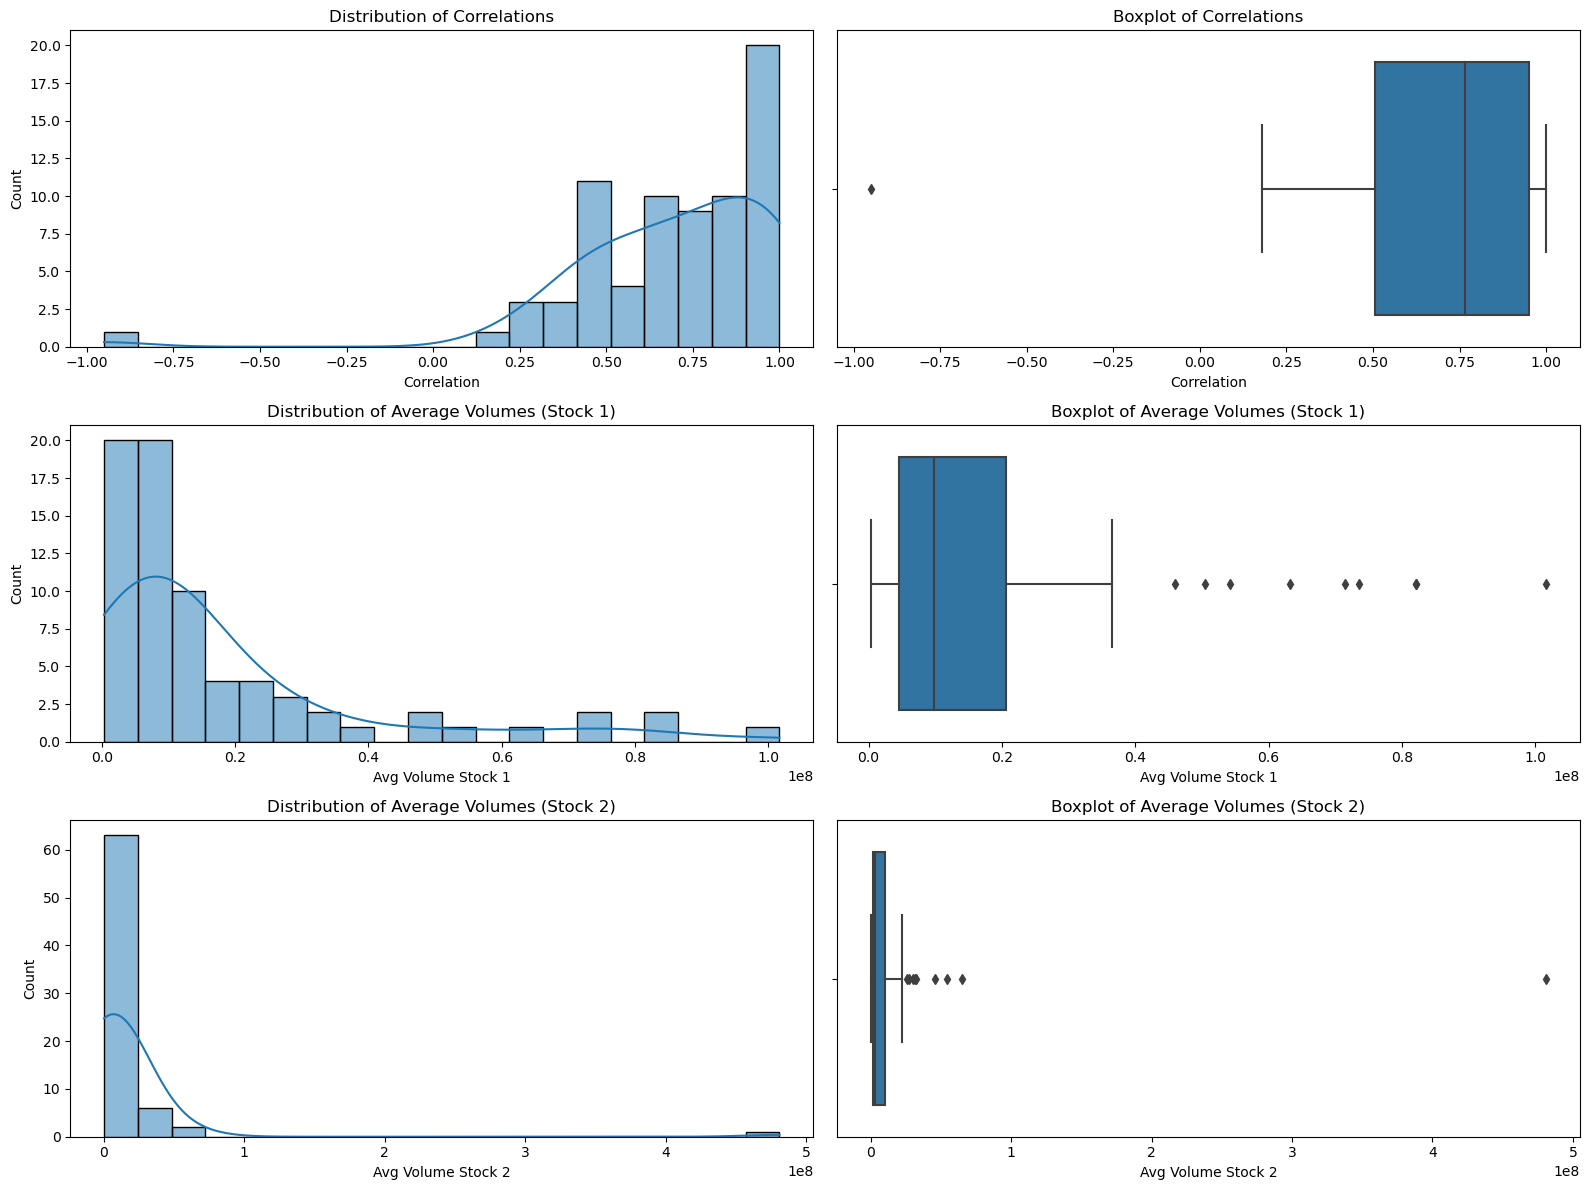

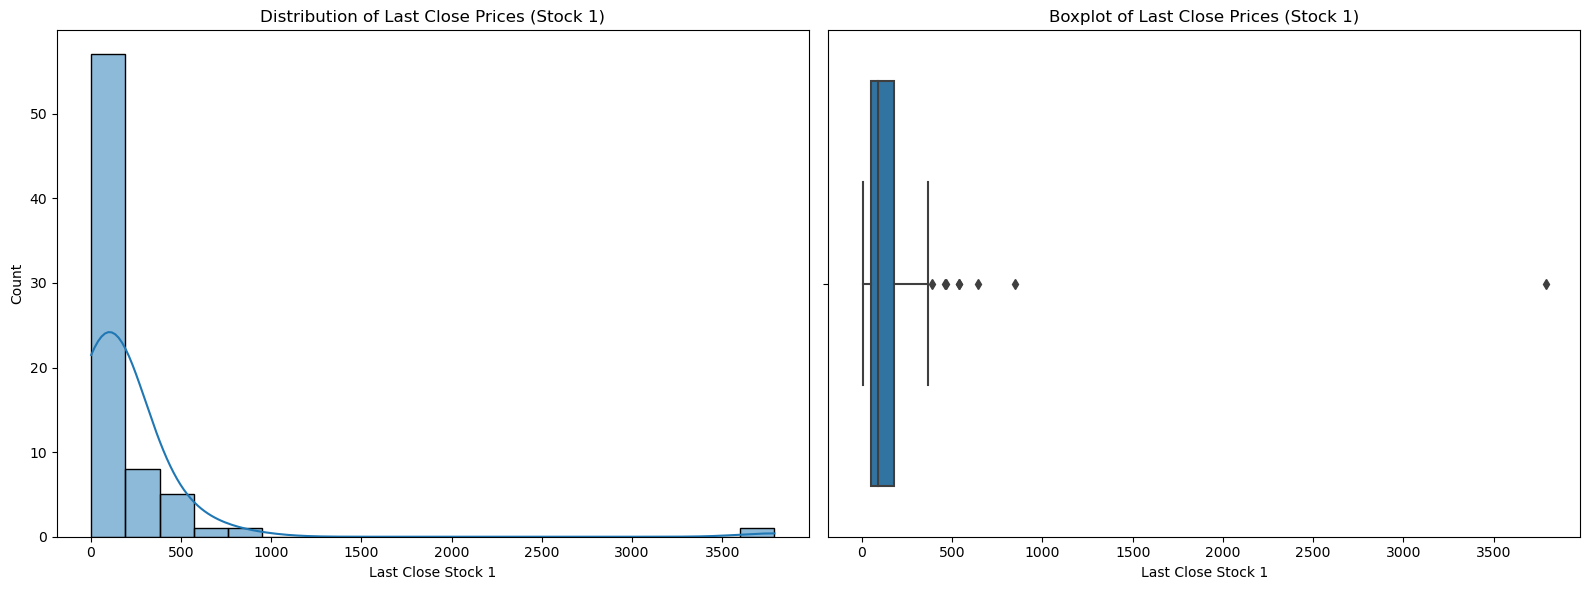

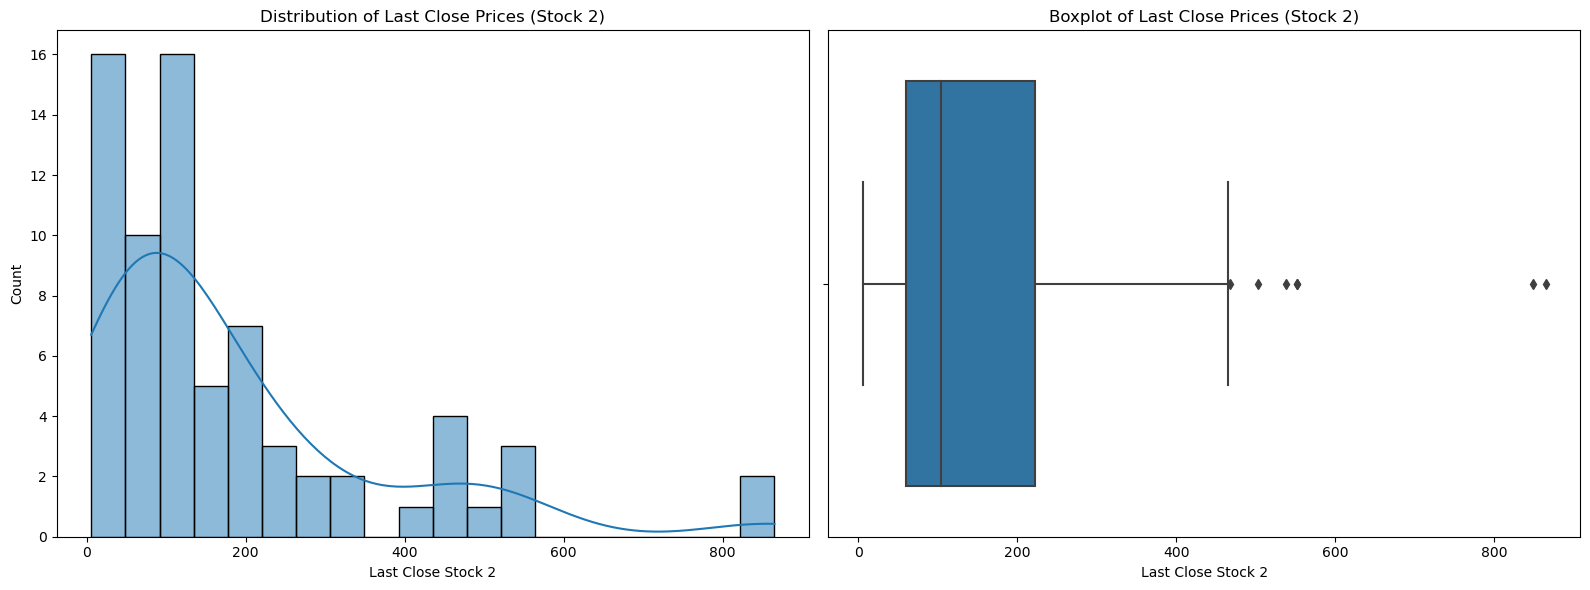

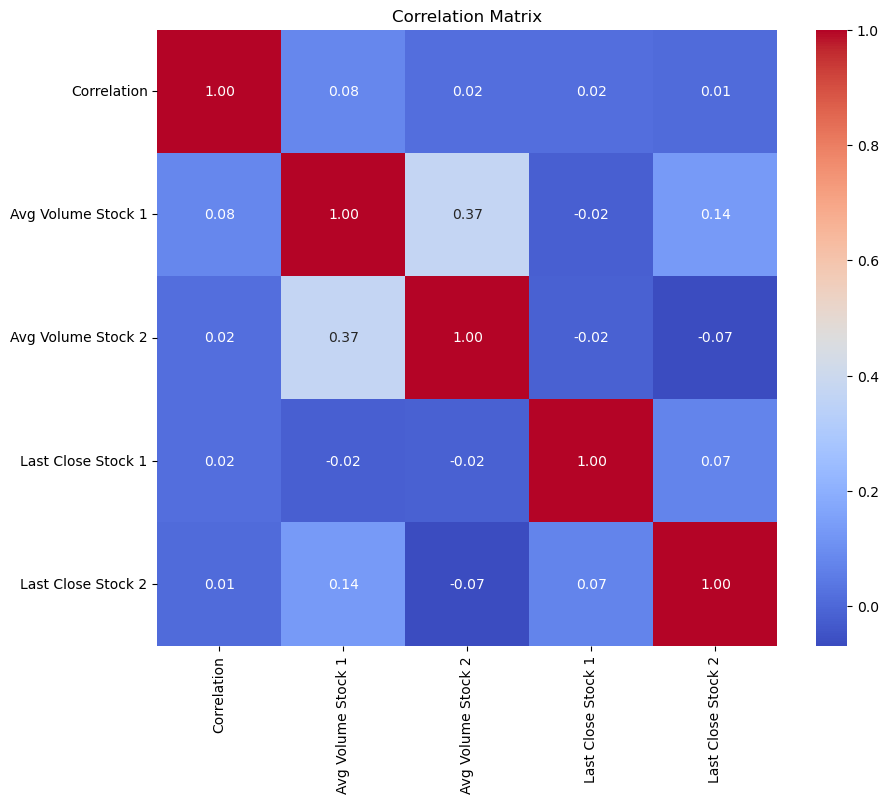

[*********************100%%**********************]  2 of 2 completed


<Figure size 1400x700 with 0 Axes>

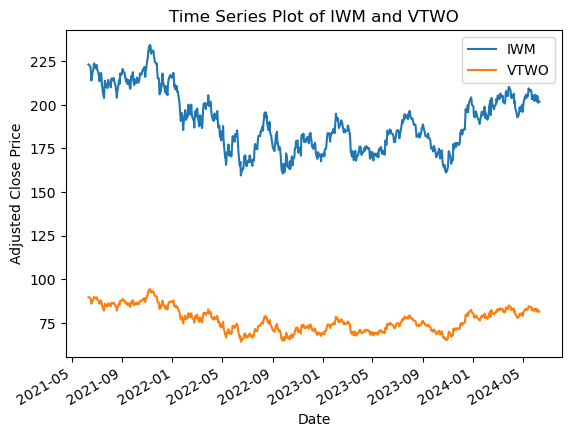

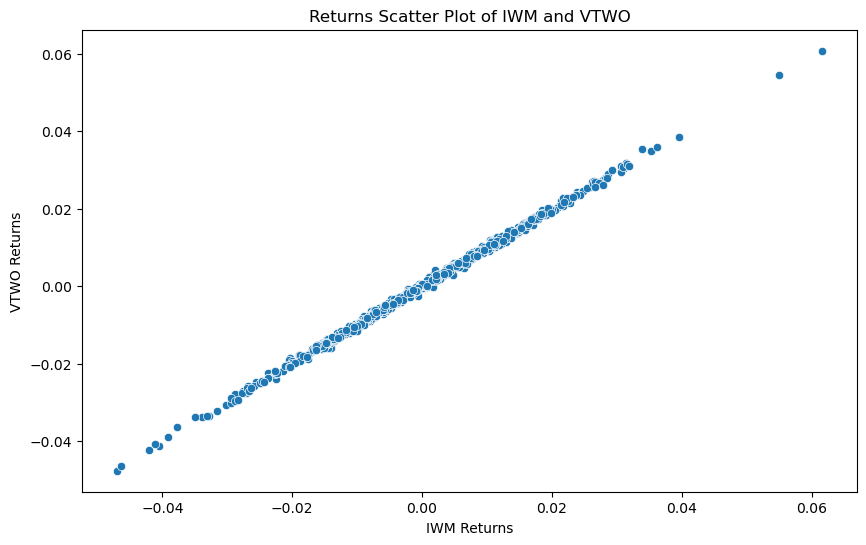

In [4]:
summary_stats = df_results_sorted.describe()
print(summary_stats)

# Distribution plots for correlation, average volumes, and last close prices
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.histplot(df_results_sorted['Correlation'], bins=20, kde=True)
plt.title('Distribution of Correlations')

plt.subplot(3, 2, 2)
sns.boxplot(x=df_results_sorted['Correlation'])
plt.title('Boxplot of Correlations')

plt.subplot(3, 2, 3)
sns.histplot(df_results_sorted['Avg Volume Stock 1'], bins=20, kde=True)
plt.title('Distribution of Average Volumes (Stock 1)')

plt.subplot(3, 2, 4)
sns.boxplot(x=df_results_sorted['Avg Volume Stock 1'])
plt.title('Boxplot of Average Volumes (Stock 1)')

plt.subplot(3, 2, 5)
sns.histplot(df_results_sorted['Avg Volume Stock 2'], bins=20, kde=True)
plt.title('Distribution of Average Volumes (Stock 2)')

plt.subplot(3, 2, 6)
sns.boxplot(x=df_results_sorted['Avg Volume Stock 2'])
plt.title('Boxplot of Average Volumes (Stock 2)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_results_sorted['Last Close Stock 1'], bins=20, kde=True)
plt.title('Distribution of Last Close Prices (Stock 1)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_results_sorted['Last Close Stock 1'])
plt.title('Boxplot of Last Close Prices (Stock 1)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_results_sorted['Last Close Stock 2'], bins=20, kde=True)
plt.title('Distribution of Last Close Prices (Stock 2)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_results_sorted['Last Close Stock 2'])
plt.title('Boxplot of Last Close Prices (Stock 2)')

plt.tight_layout()
plt.show()

# Correlation matrix plot
corr_matrix = df_results_sorted[['Correlation', 'Avg Volume Stock 1', 'Avg Volume Stock 2', 'Last Close Stock 1', 'Last Close Stock 2']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Time series plots for a selected stock pair
selected_pair = df_results_sorted.iloc[0]['Stock Pair'].split('-')
stock1, stock2 = selected_pair

data_selected = yf.download([stock1, stock2], start=start, end=end)['Adj Close']
plt.figure(figsize=(14, 7))
data_selected.plot()
plt.title(f'Time Series Plot of {stock1} and {stock2}')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

# Scatter plot of returns for the selected pair
returns_selected = data_selected.pct_change().dropna()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=returns_selected[stock1], y=returns_selected[stock2])
plt.title(f'Returns Scatter Plot of {stock1} and {stock2}')
plt.xlabel(f'{stock1} Returns')
plt.ylabel(f'{stock2} Returns')
plt.show()

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%*******

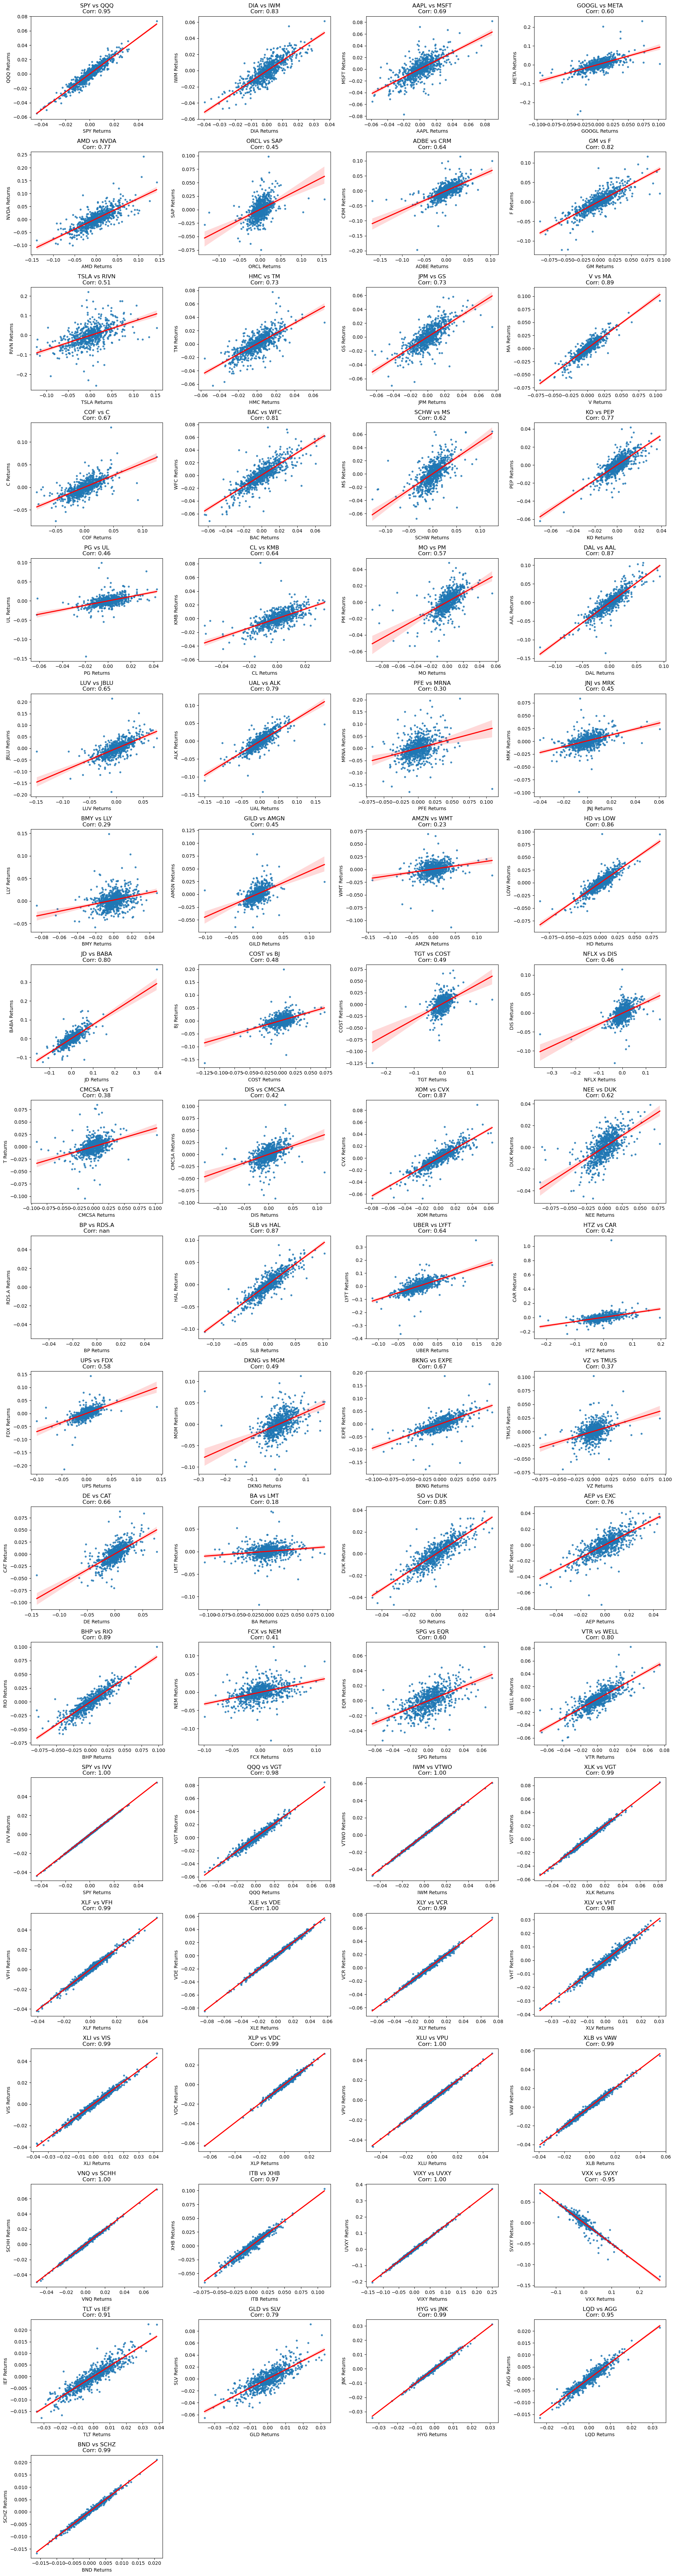

In [5]:
num_pairs = len(df_results_sorted)
cols = 4
rows = (num_pairs // cols) + (1 if num_pairs % cols != 0 else 0)

plt.figure(figsize=(20, rows * 4))

# Plot regression for each pair
for i, row in df_results_sorted.iterrows():
    stock1, stock2 = row['Stock Pair'].split('-')
    try:
        data = yf.download([stock1, stock2], start=start, end=end)['Adj Close']
        returns = data.pct_change().dropna()
        plt.subplot(rows, cols, i + 1)
        sns.regplot(x=returns[stock1], y=returns[stock2], scatter_kws={'s': 10}, line_kws={'color': 'red'})
        plt.title(f'{stock1} vs {stock2}\nCorr: {row["Correlation"]:.2f}')
        plt.xlabel(f'{stock1} Returns')
        plt.ylabel(f'{stock2} Returns')
    except Exception as e:
        print(f"Error processing {stock1} and {stock2}: {e}")

plt.tight_layout()
plt.show()

### Indicator Engineering

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


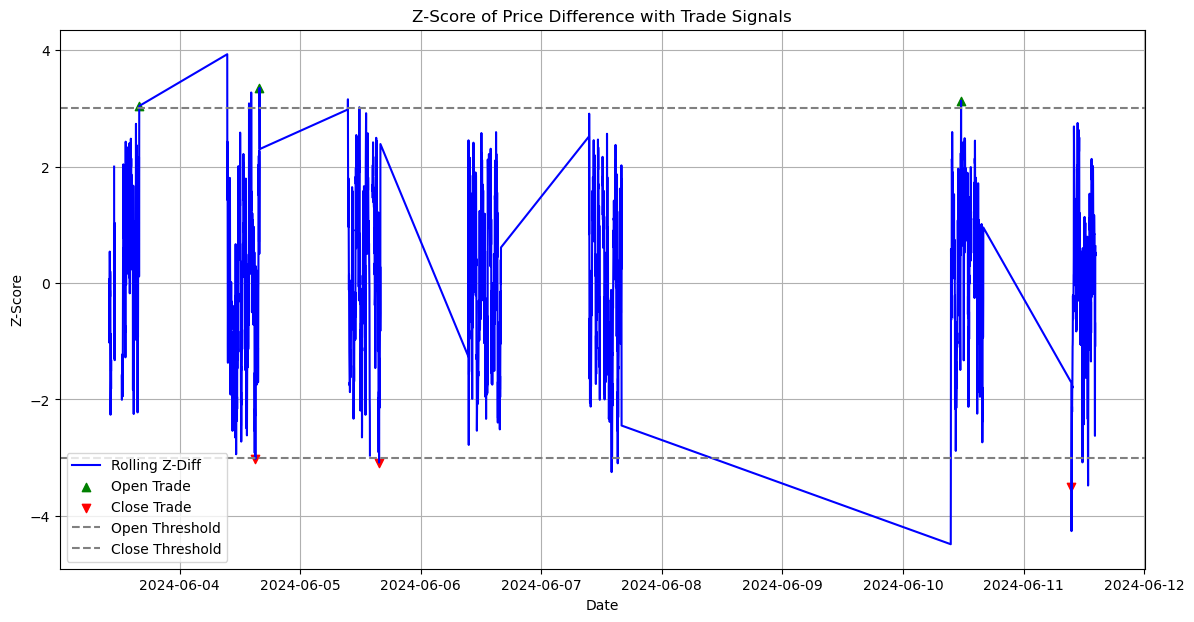

In [6]:
# Constants
stock1 = 'V'
stock2 = 'MA'
hist_period = '7d'
latency = '1m'
open_thresh = 3
close_thresh = -3

# Download historical data for both stocks
stock1_data = yf.download(stock1, period=hist_period, interval=latency)
stock2_data = yf.download(stock2, period=hist_period, interval=latency)

stock1_data.reset_index(inplace=True)
stock2_data.reset_index(inplace=True)
stock1_data_clean = stock1_data[pd.to_datetime(stock1_data['Datetime'], errors='coerce').notna()]
stock2_data_clean = stock2_data[pd.to_datetime(stock2_data['Datetime'], errors='coerce').notna()]
stock1_data_clean.set_index('Datetime', inplace=True)
stock2_data_clean.set_index('Datetime', inplace=True)

# Calculate price difference
price_diff = abs(stock1_data_clean['Close'] - stock2_data_clean['Close'])

# Calculate rolling 30-day mean and standard deviation for difference
rolling_mean_diff = price_diff.rolling(window=30).mean()
rolling_std_diff = price_diff.rolling(window=30).std()

# Calculate rolling z-score for difference
price_diff = pd.DataFrame(price_diff, columns=['Close'])  # Ensure 'Close' column exists
price_diff['Rolling_Z_Diff'] = (price_diff['Close'] - rolling_mean_diff) / rolling_std_diff
price_diff['Marker'] = None
last_marker = None  # Track the last marker type

# Add markers for opening and closing trades
for i in range(1, len(price_diff)):
    current_z_score = price_diff['Rolling_Z_Diff'].iloc[i]
    if current_z_score >= open_thresh and last_marker != 'go':
        price_diff.at[price_diff.index[i], 'Marker'] = 'go'
        last_marker = 'go'  # Update last marker
    elif current_z_score <= close_thresh and last_marker != 'ro':
        price_diff.at[price_diff.index[i], 'Marker'] = 'ro'
        last_marker = 'ro'  # Update last marker

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(price_diff.index, price_diff['Rolling_Z_Diff'], label='Rolling Z-Diff', color='blue')
plt.scatter(price_diff.index[price_diff['Marker'] == 'go'], price_diff['Rolling_Z_Diff'][price_diff['Marker'] == 'go'], color='green', marker='^', label='Open Trade')
plt.scatter(price_diff.index[price_diff['Marker'] == 'ro'], price_diff['Rolling_Z_Diff'][price_diff['Marker'] == 'ro'], color='red', marker='v', label='Close Trade')
plt.axhline(y=open_thresh, color='gray', linestyle='--', label='Open Threshold')
plt.axhline(y=close_thresh, color='gray', linestyle='--', label='Close Threshold')
plt.title('Z-Score of Price Difference with Trade Signals')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.show()

### Backtesting
Data Colection Directions: Go to https://www.barchart.com/my/price-history/download/NVDA and download the data

In [7]:
stock1 = 'V'
stock2 = 'MA'
latency = '1min'
stock1_path = f'{stock1.lower()}_intraday-{latency}_historical-data-download-06-11-2024'
stock2_path = f'{stock2.lower()}_intraday-{latency}_historical-data-download-06-11-2024'

In [8]:
# load & preview stock 1 data
stock1_df = pd.read_csv(f'/Users/keimteim/Downloads/{stock1_path}.csv')
stock1_df = stock1_df.iloc[::-1].reset_index(drop=True)
stock1_df = stock1_df.drop(stock1_df.index[0])
stock1_df = stock1_df.reset_index(drop=True)
stock1_df.rename(columns={'Last': 'Close', 'Time': 'Datetime'}, inplace=True)
stock1_df['Datetime'] = pd.to_datetime(stock1_df['Datetime'], format='%m/%d/%Y %H:%M')
stock1_df['Datetime'] = stock1_df['Datetime'].dt.tz_localize('US/Eastern')
stock1_df['Datetime'] = stock1_df['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S%z')
stock1_df

,Datetime,Open,High,Low,Close,Change,%Chg,Volume
0,2024-03-28 10:53:00-0400,278.6900,278.79,278.6900,278.7800,0.1100,+0.04%,3335.0
1,2024-03-28 10:54:00-0400,278.7800,278.97,278.7500,278.9300,0.1500,+0.05%,5185.0
2,2024-03-28 10:55:00-0400,278.9300,278.93,278.8000,278.8075,-0.1225,-0.04%,3783.0
3,2024-03-28 10:56:00-0400,278.8008,279.07,278.8000,279.0700,0.2625,+0.09%,7216.0
4,2024-03-28 10:57:00-0400,279.0650,279.17,279.0650,279.1700,0.1000,+0.04%,3854.0
...,...,...,...,...,...,...,...,...
19994,2024-06-11 12:38:00-0400,272.5700,272.59,272.5400,272.5650,-0.0050,0.00%,9658.0
19995,2024-06-11 12:39:00-0400,272.5800,272.65,272.5550,272.6477,0.0827,+0.03%,8244.0
19996,2024-06-11 12:40:00-0400,272.6800,272.72,272.6800,272.6900,0.0423,+0.02%,2526.0
19997,2024-06-11 12:41:00-0400,272.7200,272.72,272.6168,272.6300,-0.0600,-0.02%,4518.0


In [9]:
# load & preview stock 2 data
stock2_df = pd.read_csv(f'/Users/keimteim/Downloads/{stock2_path}.csv')
stock2_df = stock2_df.iloc[::-1].reset_index(drop=True)
stock2_df = stock2_df.drop(stock2_df.index[0])
stock2_df = stock2_df.reset_index(drop=True)
stock2_df.rename(columns={'Last': 'Close', 'Time': 'Datetime'}, inplace=True)
stock2_df['Datetime'] = pd.to_datetime(stock2_df['Datetime'], format='%m/%d/%Y %H:%M')
stock2_df['Datetime'] = stock2_df['Datetime'].dt.tz_localize('US/Eastern')
stock2_df['Datetime'] = stock2_df['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S%z')
stock2_df

,Datetime,Open,High,Low,Close,Change,%Chg,Volume
0,2024-03-27 15:14:00-0400,475.075,475.0750,475.0700,475.0700,-0.0700,-0.01%,350.0
1,2024-03-27 15:15:00-0400,475.130,475.1300,475.0600,475.0600,-0.0100,0.00%,300.0
2,2024-03-27 15:16:00-0400,475.130,475.1650,475.0500,475.1000,0.0400,+0.01%,1971.0
3,2024-03-27 15:17:00-0400,475.040,475.0400,474.9100,474.9100,-0.1900,-0.04%,8879.0
4,2024-03-27 15:18:00-0400,474.985,474.9850,474.7713,474.7713,-0.1387,-0.03%,760.0
...,...,...,...,...,...,...,...,...
19994,2024-06-11 12:38:00-0400,446.330,446.3401,446.2850,446.3400,-0.0100,0.00%,1281.0
19995,2024-06-11 12:39:00-0400,446.345,446.3950,446.3450,446.3950,0.0550,+0.01%,700.0
19996,2024-06-11 12:40:00-0400,446.480,446.5300,446.4400,446.5300,0.1350,+0.03%,1400.0
19997,2024-06-11 12:41:00-0400,446.470,446.4700,446.2800,446.3525,-0.1775,-0.04%,12223.0


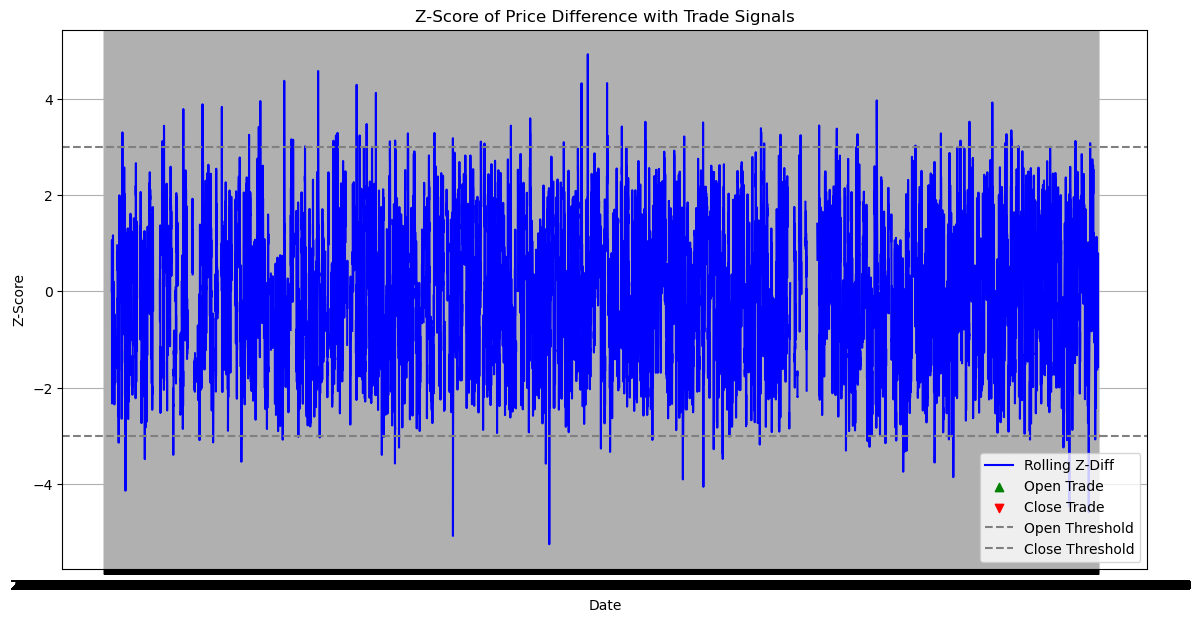

In [10]:
# Constants
hist_period = '75d'
latency = '1m'
open_thresh = 3
close_thresh = -3
bankroll = 100000

stock1_data = stock1_df
stock2_data = stock2_df
stock1_data.reset_index(inplace=True)
stock2_data.reset_index(inplace=True)
stock1_data_clean = stock1_data[pd.to_datetime(stock1_data['Datetime'], errors='coerce').notna()]
stock2_data_clean = stock2_data[pd.to_datetime(stock2_data['Datetime'], errors='coerce').notna()]
stock1_data_clean.set_index('Datetime', inplace=True)
stock2_data_clean.set_index('Datetime', inplace=True)

# Calculate differences
price_diff = abs(stock1_data_clean['Close'] - stock2_data_clean['Close'])
price_diff = pd.DataFrame(price_diff, columns=['Close'])  
price_diff.rename(columns={'Close': 'Diff'}, inplace=True)  
price_diff['stock1_price'] = stock1_data_clean['Close']
price_diff['stock2_price'] = stock2_data_clean['Close']

# Calculate rolling 30-day mean and standard deviation for difference
rolling_mean_diff = price_diff['Diff'].rolling(window=30).mean()
rolling_std_diff = price_diff['Diff'].rolling(window=30).std()

# Calculate rolling z-score for difference
price_diff['Rolling_Z_Diff'] = (price_diff['Diff'] - rolling_mean_diff) / rolling_std_diff
price_diff['Marker'] = None
last_marker = None  # Track the last marker type

# Add markers for opening and closing trades
for i in range(1, len(price_diff)):
    current_z_score = price_diff['Rolling_Z_Diff'].iloc[i]
    if current_z_score >= open_thresh and last_marker != 'go':
        price_diff.at[price_diff.index[i], 'Marker'] = 'go'
        last_marker = 'go'  # Update last marker
    elif current_z_score <= close_thresh and last_marker != 'ro':
        price_diff.at[price_diff.index[i], 'Marker'] = 'ro'
        last_marker = 'ro'  # Update last marker

plt.figure(figsize=(14, 7))
plt.plot(price_diff.index, price_diff['Rolling_Z_Diff'], label='Rolling Z-Diff', color='blue')
plt.scatter(price_diff.index[price_diff['Marker'] == 'go'], price_diff['Rolling_Z_Diff'][price_diff['Marker'] == 'go'], color='green', marker='^', label='Open Trade')
plt.scatter(price_diff.index[price_diff['Marker'] == 'ro'], price_diff['Rolling_Z_Diff'][price_diff['Marker'] == 'ro'], color='red', marker='v', label='Close Trade')
plt.axhline(y=open_thresh, color='gray', linestyle='--', label='Open Threshold')
plt.axhline(y=close_thresh, color='gray', linestyle='--', label='Close Threshold')
plt.title('Z-Score of Price Difference with Trade Signals')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.show()

### Backtesting Simulation

In [13]:
df = price_diff
    
open_thresh = 3
close_thresh = -3

# Initialize variables for backtesting simulation
bankroll = 100000
shares_held_stock1 = 0
shares_held_stock2 = 0

results = []

for index, row in df.iterrows():
    if row['Marker'] == 'go':
        if row['stock1_price'] > row['stock2_price']: # Determine more expensive stock
            more_expensive_price = row['stock1_price']
            less_expensive_price = row['stock2_price']
            shares_sold = (0.2 * bankroll) // more_expensive_price # Sell .2x bankroll of more expensive stock
            shares_bought = (0.2 * bankroll) // less_expensive_price # Buy .2x bankroll of less expensive stock
            bankroll += shares_sold * more_expensive_price
            bankroll -= shares_bought * less_expensive_price
            shares_held_stock1 = shares_sold  # Log positions
            shares_held_stock2 = shares_bought  
        else:
            more_expensive_price = row['stock2_price']
            less_expensive_price = row['stock1_price']
            shares_sold = (0.45 * bankroll) // more_expensive_price
            shares_bought = (0.45 * bankroll) // less_expensive_price
            bankroll += shares_sold * more_expensive_price
            bankroll -= shares_bought * less_expensive_price
            shares_held_stock2 = shares_sold  
            shares_held_stock1 = shares_bought  
        
        # Log transaction
        results.append({
            'Datetime': row[1],
            'Action': 'Open trade',
            'Shares sold': shares_sold,
            'Shares bought': shares_bought,
            'Bankroll': bankroll
        })
        
    elif row['Marker'] == 'ro' and (shares_held_stock1 > 0 or shares_held_stock2 > 0):
        # Close the previously opened trade
        # Sell previously bought stock and buy back previously sold stock
        bankroll += shares_held_stock1 * row['stock1_price']  # Stock1 was bought, now selling it
        bankroll -= shares_held_stock2 * row['stock2_price']  # Stock2 was sold, now buying it back

        # Log transaction
        results.append({
            'Datetime': row[1],
            'Action': 'Close trade',
            'Shares sold back': shares_held_stock2,
            'Shares bought back': shares_held_stock1,
            'Bankroll': bankroll
        })

        # Reset shares held
        shares_held_stock1 = 0
        shares_held_stock2 = 0

results_df = pd.DataFrame(results)
results_df.tail()         

,Datetime,Action,Shares sold,Shares bought,Bankroll,Shares sold back,Shares bought back
47,279.47,Close trade,NaN,NaN,103805.1012,103.0,168.0
48,274.63,Open trade,104.0,170.0,103580.0012,NaN,NaN
49,274.00,Close trade,NaN,NaN,103730.2412,104.0,170.0
50,273.05,Open trade,104.0,170.0,103768.5412,NaN,NaN
51,273.19,Close trade,NaN,NaN,103749.3612,104.0,170.0


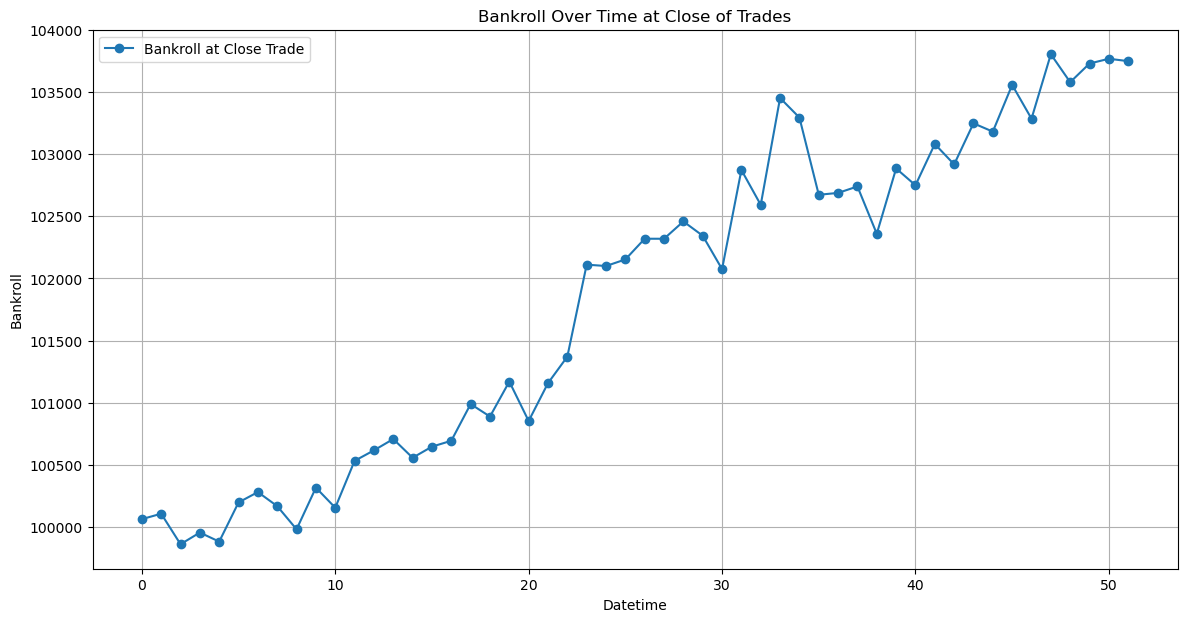

Pair: V, MA
Open Thresh: 3, Close Thresh: -3


In [14]:
final_bankroll = results_df['Bankroll'].iloc[-1]
p_n_l = final_bankroll - bankroll
retrn = p_n_l / bankroll

plt.figure(figsize=(14, 7))
plt.plot(results_df['Bankroll'], label='Bankroll at Close Trade', marker='o')
plt.title('Bankroll Over Time at Close of Trades')
plt.xlabel('Datetime')
plt.ylabel('Bankroll')
plt.grid(True)
plt.legend()
plt.show()

print(f'Pair: {stock1}, {stock2}')
print(f'Open Thresh: {open_thresh}, Close Thresh: {close_thresh}')